# Retrieving data from the Bahrain GP (Yuki Tsunoda)

In [85]:
import pandas as pd 
import fastf1 as f1
import fastf1.plotting
import matplotlib.pyplot as plt

In [86]:
session = f1.get_session(2025, 'Bahrain', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '16', '12', '10', '4', '1', '55', '44', '22', '7', '6', '27', '14', '31', '23', '30', '5', '18', '87

In [87]:
tsunoda_fastest = session.laps.pick_drivers('TSU').pick_fastest()
tsunoda_car_data = tsunoda_fastest.get_car_data().add_distance()
t = tsunoda_car_data['Distance']
vCar = tsunoda_car_data['Speed']
yuki_lap_time = str(tsunoda_fastest['LapTime'])

c:\Users\chchr\Python Projects\yuki_analysis\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


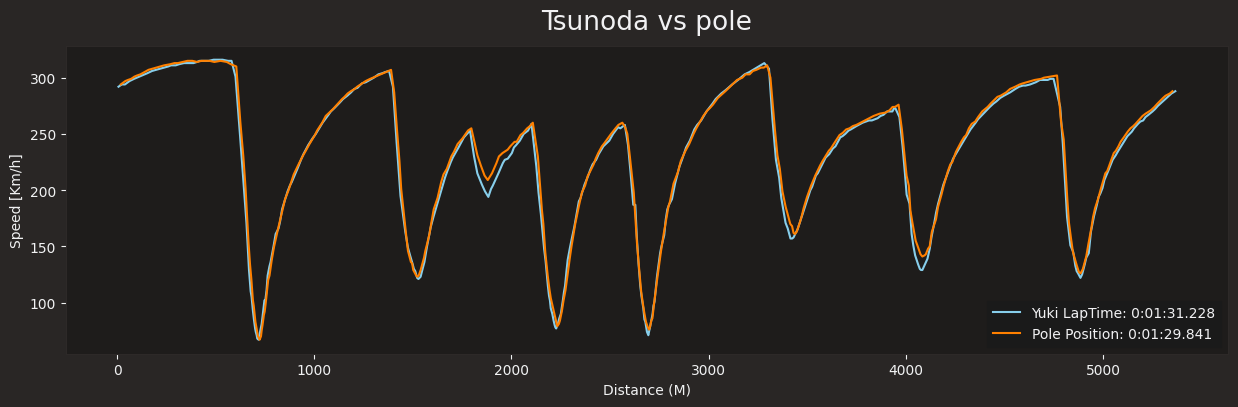

<Figure size 640x480 with 0 Axes>

In [88]:
pole_lap = session.laps.pick_driver('PIA').pick_fastest()
pole_lap_car = pole_lap.get_car_data().add_distance()
t_pole = pole_lap_car['Distance']
vCar_pole = pole_lap_car['Speed']
pole_lap_time = str(pole_lap['LapTime'])

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

pias_color = fastf1.plotting.get_team_color(pole_lap['Team'], session=session)

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(t, vCar, label=f'Yuki LapTime: {yuki_lap_time[8:19]}', color='Skyblue')
ax.plot(t_pole, vCar_pole, label=f'Pole Position: {pole_lap_time[8:19]}', color=pias_color)

ax.set_xlabel('Distance (M)')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Tsunoda vs pole')
ax.legend()
plt.show()
plt.savefig('speed.png')

In [89]:
pole_telemetry = pole_lap.get_telemetry()
pole_telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-04-12 17:08:36.833,0 days 01:21:01.871000,,902.350556,0 days 00:00:00,11356.300000,291.900000,7,99.0,False,12,interpolation,0.047483,0.000009,OnTrack,-357.360056,1289.134258,-160.603983
3,2025-04-12 17:08:36.933,0 days 01:21:01.971000,,902.350556,0 days 00:00:00.100000,11125.362500,292.837500,7,99.0,False,12,pos,8.209867,0.001525,OnTrack,-354.000000,1370.000000,-161.000000
4,2025-04-12 17:08:37.057,0 days 01:21:02.095000,,902.350556,0 days 00:00:00.224000,10839.000000,294.000000,7,99.0,False,12,car,18.373333,0.003412,OnTrack,-350.133922,1471.027408,-161.199683
5,2025-04-12 17:08:37.153,0 days 01:21:02.191000,,902.350556,0 days 00:00:00.320000,10716.257143,295.028571,7,99.0,False,12,pos,26.273802,0.004879,OnTrack,-347.000000,1550.000000,-161.000000
6,2025-04-12 17:08:37.337,0 days 01:21:02.375000,1,902.350556,0 days 00:00:00.504000,10481.000000,297.000000,8,99.0,False,12,car,41.473333,0.007702,OnTrack,-340.187094,1702.134905,-159.935540


In [90]:
tsunoda_telemetry = tsunoda_fastest.get_telemetry()
tsunoda_telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-04-12 16:45:21.246,0 days 00:57:46.284000,,54.913056,0 days 00:00:00,11503.920100,291.140001,7,100.0,False,12,interpolation,0.046865,0.000009,OnTrack,-356.228832,1320.991884,-160.999752
3,2025-04-12 16:45:21.332,0 days 00:57:46.370000,,54.913056,0 days 00:00:00.086000,11571.000000,292.000000,7,100.0,False,12,car,7.038889,0.001308,OnTrack,-353.861600,1375.013893,-160.999387
4,2025-04-12 16:45:21.532,0 days 00:57:46.570000,4,54.913056,0 days 00:00:00.286000,11598.000000,294.000000,7,100.0,False,12,car,23.372222,0.004344,OnTrack,-346.047184,1561.850818,-160.999992
5,2025-04-12 16:45:21.533,0 days 00:57:46.571000,4,54.840282,0 days 00:00:00.287000,11593.135311,294.000000,7,100.0,False,12,pos,23.453869,0.004359,OnTrack,-346.000000,1563.000000,-161.000000
6,2025-04-12 16:45:21.732,0 days 00:57:46.770000,4,40.357500,0 days 00:00:00.486000,10625.000000,294.000000,7,100.0,False,12,pos,39.705556,0.007380,OnTrack,-336.000000,1808.000000,-161.000000


C:\Users\chchr\AppData\Local\Temp\ipykernel_12840\3721617013.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pole_telemetry = pd.concat([pole_telemetry, empty_rows], ignore_index=True)


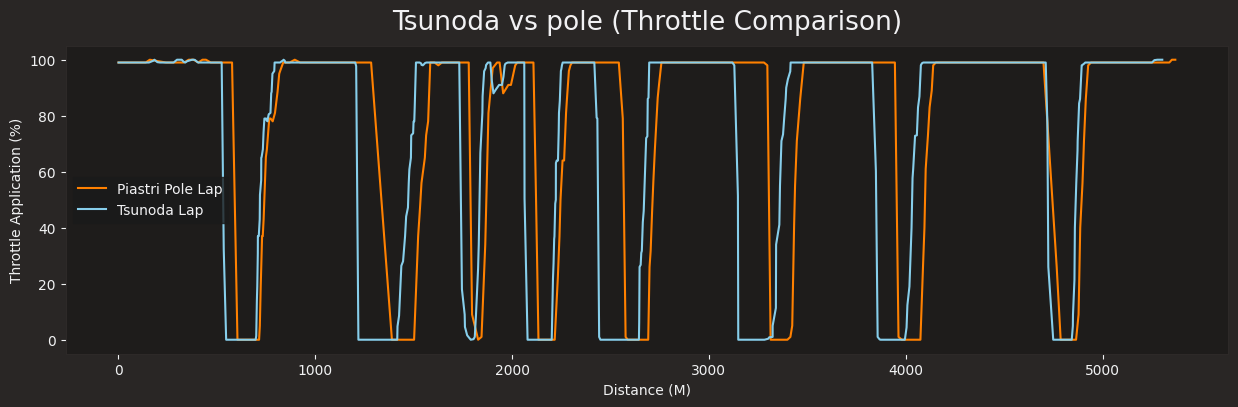

<Figure size 640x480 with 0 Axes>

In [91]:
empty_rows = pd.DataFrame([[None] * len(pole_telemetry.columns)] * 9, columns=pole_telemetry.columns)
pole_telemetry = pd.concat([pole_telemetry, empty_rows], ignore_index=True)


fig, ax = plt.subplots(figsize=(15,4))



ax.plot(pole_telemetry['Distance'], pole_telemetry['Throttle'], color=pias_color, label='Piastri Pole Lap')
ax.plot(tsunoda_telemetry['Distance'], pole_telemetry['Throttle'], color='Skyblue', label='Tsunoda Lap')

ax.set_xlabel('Distance (M)')
ax.set_ylabel('Throttle Application (%)')
ax.set_title('Tsunoda vs pole (Throttle Comparison)')
ax.legend()
plt.show()
plt.savefig('throttle.png')

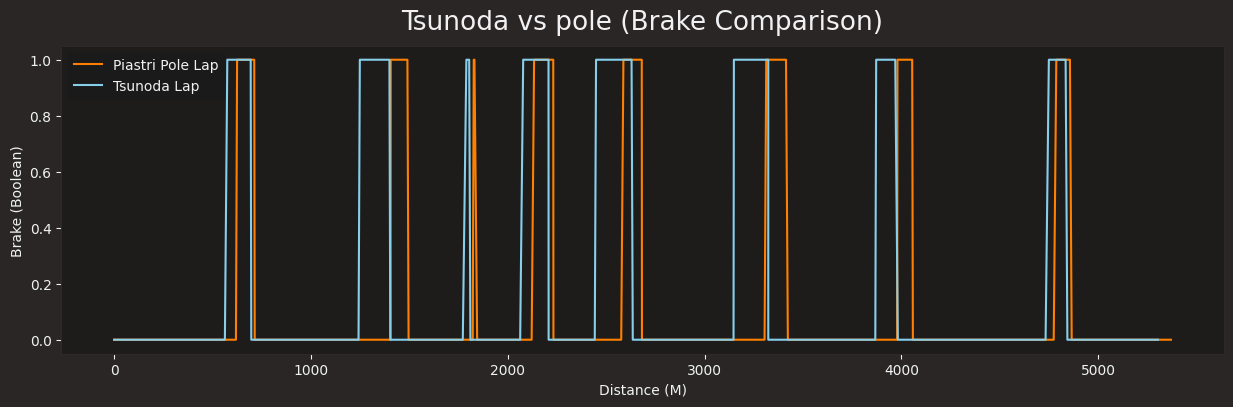

<Figure size 640x480 with 0 Axes>

In [92]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(pole_telemetry['Distance'], pole_telemetry['Brake'], color=pias_color, label='Piastri Pole Lap')
ax.plot(tsunoda_telemetry['Distance'], pole_telemetry['Brake'], color='Skyblue', label='Tsunoda Lap')

ax.set_xlabel('Distance (M)')
ax.set_ylabel('Brake (Boolean)')
ax.set_title('Tsunoda vs pole (Brake Comparison)')
ax.legend()
plt.show()
plt.savefig('brake.png')

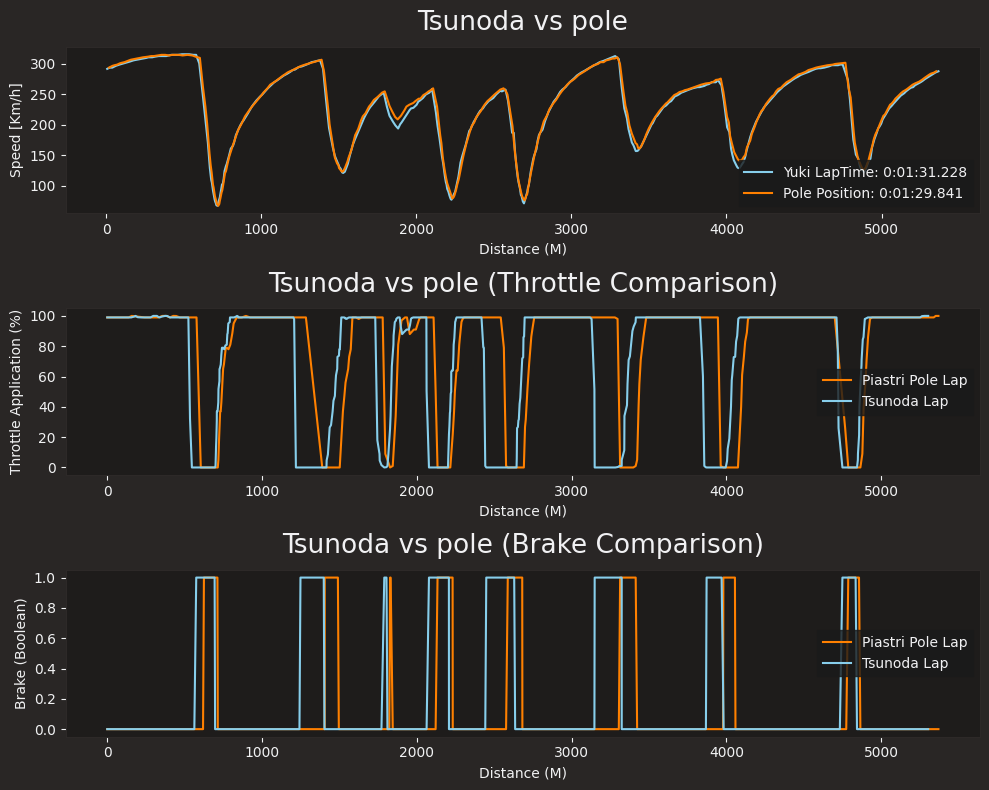

<Figure size 640x480 with 0 Axes>

In [93]:

fig, ax = plt.subplots(3, 1, figsize=(10, 8))  # 2 rows, 2 columns



ax[0].plot(t, vCar, label=f'Yuki LapTime: {yuki_lap_time[8:19]}', color='Skyblue')
ax[0].plot(t_pole, vCar_pole, label=f'Pole Position: {pole_lap_time[8:19]}', color=pias_color)
ax[0].set_xlabel('Distance (M)')
ax[0].set_ylabel('Speed [Km/h]')
ax[0].set_title('Tsunoda vs pole')
ax[0].legend()

ax[1].plot(pole_telemetry['Distance'], pole_telemetry['Throttle'], color=pias_color, label='Piastri Pole Lap')
ax[1].plot(tsunoda_telemetry['Distance'], pole_telemetry['Throttle'], color='Skyblue', label='Tsunoda Lap')
ax[1].set_xlabel('Distance (M)')
ax[1].set_ylabel('Throttle Application (%)')
ax[1].set_title('Tsunoda vs pole (Throttle Comparison)')
ax[1].legend()

ax[2].plot(pole_telemetry['Distance'], pole_telemetry['Brake'], color=pias_color, label='Piastri Pole Lap')
ax[2].plot(tsunoda_telemetry['Distance'], pole_telemetry['Brake'], color='Skyblue', label='Tsunoda Lap')
ax[2].set_xlabel('Distance (M)')
ax[2].set_ylabel('Brake (Boolean)')
ax[2].set_title('Tsunoda vs pole (Brake Comparison)')
ax[2].legend()


plt.tight_layout()
plt.show()
plt.savefig('Telemetry for Tsunoda vs. Piastri.png')